# <font color='red'><b>Bootstrap assignment</b> </font>

<b>There will be some functions that start with the word "grader" ex: grader_sampples(), grader_30().. etc, you should not change those function definition.

Every Grader function has to return True.</b>

<font color='blue'> <b>Importing packages</b> </font>

In [91]:
import numpy as np # importing numpy for numerical computation
from sklearn.datasets import load_boston # here we are using sklearn's boston dataset
from sklearn.metrics import mean_squared_error # importing mean_squared_error metric
import random
from sklearn.tree import DecisionTreeRegressor
from statistics import median,mean,pstdev
import math
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [92]:
boston = load_boston()
x=boston.data #independent variables
y=boston.target #target variable

In [93]:
x.shape

(506, 13)

In [94]:
x[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

## <font color='red'><b>Task 1</b></font>

<font color='red'> <b>Step - 1</b></font>

*  <font color='blue'><b>Creating samples</b></font><br>
    <b> Randomly create 30 samples from the whole boston data points</b>
    *  Creating each sample: Consider any random 303(60% of 506) data points from whole data set and then replicate any 203 points from the sampled points
    
     For better understanding of this procedure lets check this examples, assume we have 10 data points [1,2,3,4,5,6,7,8,9,10], first we take 6 data points randomly , consider we have selected [4, 5, 7, 8, 9, 3] now we will replicate 4 points from [4, 5, 7, 8, 9, 3], consder they are [5, 8, 3,7] so our final sample will be [4, 5, 7, 8, 9, 3, 5, 8, 3,7]
* <font color='blue'><b> Create 30 samples </b></font>
    *  Note that as a part of the Bagging when you are taking the random samples <b>make sure each of the sample will have different set of columns</b><br>
Ex: Assume we have 10 columns[1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10] for the first sample we will select [3, 4, 5, 9, 1, 2] and for the second sample  [7, 9, 1, 4, 5, 6, 2] and so on...
Make sure each sample will have atleast 3 feautres/columns/attributes

* <font color='red'><b> Note - While selecting the random 60% datapoints from the whole data, make sure that the selected datapoints are all exclusive, repetition is not allowed. </b></font>

<font color='red'><b>Step - 2 </b></font>

<font color='blue'><b>Building High Variance Models on each of the sample and finding train MSE value</b></font>

*  Build a regression trees on each of 30 samples.
*  Computed the predicted values of each data point(506 data points) in your corpus.
*  Predicted house price of $i^{th}$ data point $y^{i}_{pred} =  \frac{1}{30}\sum_{k=1}^{30}(\text{predicted value of } x^{i} \text{ with } k^{th} \text{ model})$
*  Now calculate the $MSE =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$

<font color='red'> <b>Step - 3 </b></font>

*  <font color='blue'><b>Calculating the OOB score </b></font>

*  Predicted house price of $i^{th}$ data point $y^{i}_{pred} =  \frac{1}{k}\sum_{\text{k= model which was buit on samples not included } x^{i}}(\text{predicted value of } x^{i} \text{ with } k^{th} \text{ model})$.
*  Now calculate the $OOB Score =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$.

# <font color='red'><b>Task 2</b></font>

*  <font color='blue'><b>Computing CI of OOB Score and Train MSE</b></font>
  *   Repeat Task 1 for 35 times, and for each iteration store the Train MSE and OOB score </li>
<li> After this we will have 35 Train MSE values and 35 OOB scores </li>
<li> using these 35 values (assume like a sample) find the confidence intravels of MSE and OOB Score </li>
<li> you need to report CI of MSE and CI of OOB Score </li>
<li> Note: Refer the Central_Limit_theorem.ipynb to check how to find the confidence intravel</li>
</ol>

# <font color='red'><b>Task 3</b></font>

*  <font color='blue'><b>Given a single query point predict the price of house.</b></font>

Consider xq= [0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.95,7.0,30.0,19.1,372.13,18.60] 
Predict the house price for this point as mentioned in the step 2 of Task 1.

## <font color='red'><b>A few key points</b></font>

* Remember that the datapoints used for calculating MSE score contain some datapoints that were initially used while training the base learners (the 60% sampling). This makes these datapoints partially seen (i.e. the datapoints used for calculating the MSE score are a mixture of seen and unseen data).
Whereas, the datapoints used for calculating OOB score have only the unseen data. This makes these datapoints completely unseen and therefore appropriate for testing the model's performance on unseen data.

* Given the information above, if your logic is correct, the calculated MSE score should be less than the OOB score.

* The MSE score must lie between 0 and 10.
* The OOB score must lie between 10 and 35.

* The difference between the left nad right confidence-interval values must not be more than 10. Make sure this is true for both MSE and OOB confidence-interval values.

# <font color='blue'> <b>Task - 1</b></font>

<font color='blue'><b>Step - 1</b></font>

*  <font color='blue'> <b>Creating samples</b></font>

<font color='Orange'><b>Algorithm</b></font>

![alt text](https://i.imgur.com/OfcFrUP.jpg/)

*  <font color='blue'><b> Write code for generating samples</b></font>

In [95]:
def generating_samples(input_data, target_data):

    '''In this function, we will write code for generating 30 samples '''
    selected_rows=random.sample(list(np.arange(len(input_data))),303)
    replicated_rows=random.choices(selected_rows,k=203)
    selected_columns=random.sample(list(np.arange(input_data.shape[1])),6)
    sample_data=np.take(a=input_data,indices=selected_rows,axis=0)
    sample_data=np.take(a=sample_data,indices=selected_columns,axis=1)
    target_sample=target_data[selected_rows]
    replicated_data=np.take(a=input_data,indices=replicated_rows,axis=0)
    replicated_data=np.take(a=replicated_data,indices=selected_columns,axis=1)
    target_replicated=target_data[replicated_rows]
    sampled_input_data=np.vstack((sample_data,replicated_data))
    sampled_target_data=np.vstack((target_sample.reshape(-1,1),target_replicated.reshape(-1,1)))
    # you can use random.choice to generate random indices without replacement
    # Please have a look at this link https://docs.scipy.org/doc/numpy-1.16.0/reference/generated/numpy.random.choice.html for more details
    # Please follow above pseudo code for generating samples 
    

    return list(sampled_input_data),list(sampled_target_data),selected_rows,selected_columns
    #note please return as lists

<font color='cyan'> <b> Grader function - 1 </b> </fongt>

In [96]:
def grader_samples(a,b,c,d):
    length = (len(a)==506  and len(b)==506)
    sampled = (len(a)-len(set([str(i) for i in a]))==203)
    rows_length = (len(c)==303)
    column_length= (len(d)>=3)
    assert(length and sampled and rows_length and column_length)
    return True
a,b,c,d = generating_samples(x, y)
grader_samples(a,b,c,d)

True

*  <font color='blue'> <b>Create 30 samples </b>

![alt text](https://i.imgur.com/p8eZaWL.jpg)

In [97]:
# Use generating_samples function to create 30 samples 
# store these created samples in a list
list_input_data1 =[]
list_output_data1 =[]
list_selected_rows1= []
list_selected_columns1=[]
for i in range(0,30):
  a,b,c,d=generating_samples(x,y)
  list_input_data1.append(a)
  list_output_data1.append(b)
  list_selected_rows1.append(c)
  list_selected_columns1.append(d)

<font color='cyan'> <b>Grader function - 2 </b></font>

In [98]:
def grader_30(a):
    assert(len(a)==30 and len(a[0])==506)
    return True
grader_30(list_input_data1)

True

<br>

<font color='red'><b>Step - 2 </b></font>

<font color='orange'><b>Flowchart for building tree</b></font>

![alt text](https://i.imgur.com/pcXfSmp.png)

*  <font color='blue'><b> Write code for building regression trees</b></font>

In [99]:
list_of_all_models1=[]
for i in range(len(list_input_data1)):
  model=DecisionTreeRegressor(max_depth=None)
  model.fit(list_input_data1[i],list_output_data1[i])
  list_of_all_models1.append(model)

<font color='orange'><b>Flowchart for calculating MSE </b></font>

![alt text](https://i.imgur.com/sPEE618.png)

In [100]:
y_pred=[]
for i in range(len(x)):
  list_y=[]
  for j in range(len(list_of_all_models1)):
    output=list_of_all_models1[j].predict(x[i][list_selected_columns1[j]].reshape(1,-1))
    list_y.append(output)
  y_med=median(list_y)
  y_pred.append(y_med)

After getting predicted_y for each data point, we can use sklearns mean_squared_error to calculate the MSE between predicted_y and actual_y.

*  <font color='blue'><b> Write code for calculating MSE</b></font>

In [101]:
mse=mean_squared_error(y,y_pred)
print('Mean Squared Error =',mse)

Mean Squared Error = 0.07689723320158101


<font color='blue'><b>Step - 3 </b></font>

<font color='orange'><b>Flowchart for calculating OOB score</b></font>

![alt text](https://i.imgur.com/95S5Mtm.png)

Now calculate the $OOB Score =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$.

*  <font color='blue'><b> Write code for calculating OOB score </b></font>

In [102]:
y_pred=[]
for i in range(len(x)):
  list_y=[]
  for j in range(len(list_of_all_models1)):
    is_in_list = np.any(np.all(x[i][list_selected_columns1[j]] == np.array(list_input_data1[j]), axis=1))
    if is_in_list==False:
      output=list_of_all_models1[j].predict(x[i][list_selected_columns1[j]].reshape(1,-1))
      list_y.append(output)  
  y_med=median(list_y)
  y_pred.append(y_med)

In [103]:
sum=0
for i in range(len(y)):
  sum+=(y[i]-y_pred[i])**2
oob_score=sum/506
print('OOB Score =',oob_score.item())

OOB Score = 14.319355511638115


# <font color='blue'><b>Task 2</b></font>

In [104]:
print(list(range(0,35)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


In [105]:
list_mse=[]
list_oob=[]
for i in range(0,35):
  list_input_data =[]
  list_output_data =[]
  list_selected_rows= []
  list_selected_columns=[]
  for i in range(0,30):
    a,b,c,d=generating_samples(x,y)
    list_input_data.append(a)
    list_output_data.append(b)
    list_selected_rows.append(c)
    list_selected_columns.append(d)
  list_of_all_models=[]
  for i in range(len(list_input_data)):
    model=DecisionTreeRegressor(max_depth=None)
    model.fit(list_input_data[i],list_output_data[i])
    list_of_all_models.append(model)
  y_pred=[]
  for i in range(len(x)):
    list_y=[]
    for j in range(len(list_of_all_models)):
      output=list_of_all_models[j].predict(x[i][list_selected_columns[j]].reshape(1,-1))
      list_y.append(output)
    y_med=median(list_y)
    y_pred.append(y_med)  
  mse=mean_squared_error(y,y_pred)
  list_mse.append(mse)
  y_pred=[]
  for i in range(len(x)):
    list_y=[]
    for j in range(len(list_of_all_models)):
      is_in_list = np.any(np.all(x[i][list_selected_columns[j]] == np.array(list_input_data[j]), axis=1))
      if is_in_list==False:
        output=list_of_all_models[j].predict(x[i][list_selected_columns[j]].reshape(1,-1))
        list_y.append(output)  
    y_med=median(list_y)
    y_pred.append(y_med)
  sum=0
  for i in range(len(y)):
    sum+=(y[i]-y_pred[i])**2
  oob_score=sum/506
  list_oob.append(oob_score.item())

In [109]:
mse_bar=mean(list_mse)
oob_bar=mean(list_oob)
sigma_mse=pstdev(list_mse)
sigma_oob=pstdev(list_oob)
up_mse=mse_bar+2*(sigma_mse/math.sqrt(35))
low_mse=mse_bar-2*(sigma_mse/math.sqrt(35))
up_oob=oob_bar+2*(sigma_oob/math.sqrt(35))
low_oob=oob_bar-2*(sigma_oob/math.sqrt(35))
print('Confidence Interval of MSE = [{},{}]'.format(low_mse,up_mse))
print('Confidence Interval of OOB score = [{},{}]'.format(low_oob,up_oob))

Confidence Interval of MSE = [0.05162920787841346,0.09448611708898663]
Confidence Interval of OOB score = [14.81982368617374,16.221167313026335]


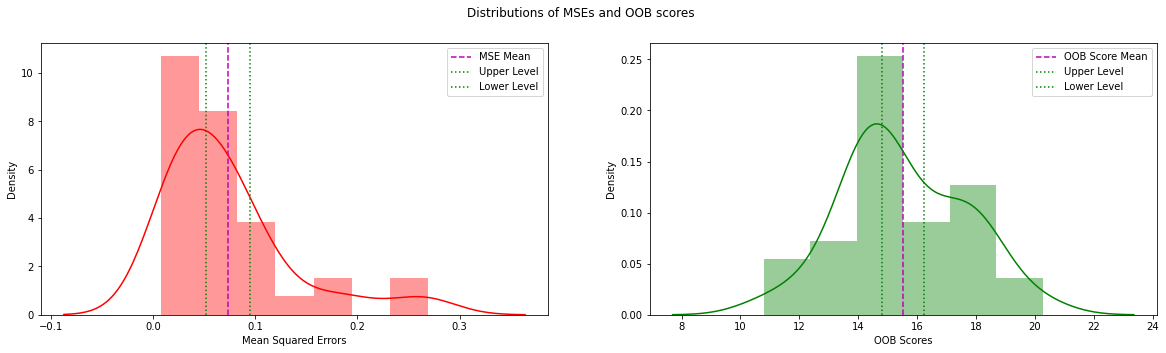

In [111]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sn.distplot(list_mse, color='r')
plt.axvline(mse_bar, linestyle="--", color='m', label="MSE Mean")
plt.axvline(up_mse, linestyle=":", color='g', label="Upper Level")
plt.axvline(low_mse, linestyle=":", color='g', label="Lower Level")
plt.xlabel('Mean Squared Errors')
plt.legend()
plt.subplot(1,2,2)
sn.distplot(list_oob, color='g')
plt.axvline(oob_bar, linestyle="--", color='m', label="OOB Score Mean")
plt.axvline(up_oob, linestyle=":", color='g', label="Upper Level")
plt.axvline(low_oob, linestyle=":", color='g', label="Lower Level")
plt.xlabel('OOB Scores')
plt.legend()
plt.suptitle('Distributions of MSEs and OOB scores')
plt.show()

# <font color='blue'><b>Task 3</b></font>

<font color='orange'><b>Flowchart for Task 3</b></font>

<b>Hint: </b> We created 30 models by using 30 samples in TASK-1. Here, we need send query point "xq"  to 30 models and perform the regression on the output generated by 30 models.

![alt text](https://i.imgur.com/Y5cNhQk.png)

*  <font color='blue'><b> Write code for TASK 3 </b></font>

In [108]:
xq=np.array( [0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.95,7.0,30.0,19.1,372.13,18.60]) 
list_y=[]
for j in range(len(list_of_all_models1)):
    output=list_of_all_models1[j].predict(xq[list_selected_columns1[j]].reshape(1,-1))
    list_y.append(output)
y_output=median(list_y)
print('Predicted House Price =',y_output.item())  

Predicted House Price = 18.5


<br><br><br>

<font color='red'><b>Write observations for task 1, task 2, task 3 indetail</b></font>

# **Observation :**
1. In task 1, we manually created a random forest model. First of all we created 30 samples using row sampling and column sampling then we created 30 high variance decision trees upto full depth and trained them with these 30 created samples respectively. Using these trained models we calculated MSE. We also calculated OOB scores(out of bag scores) using OOB datapoints.
2. In task 2, we repeated task 1 35 times to get 35 different samples of MSE and OOB scores. After that we calculated confidence intervals of both samples of MSEs and OOB scores and plotted them.
3. In task 3, we used previously manually implemented random forest model to predict the output of given query point xq.